# 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (1797, 64)
y shape: (1797,)


label: 4


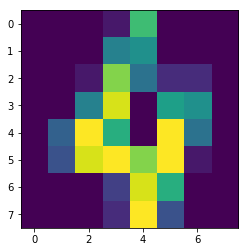

In [4]:
num = 4
print('label: {}'.format(y[num]))
plt.imshow(X[num, :].reshape((8, 8)))
plt.show()

In [5]:
grid_parameter = {'max_depth': np.arange(3, 5),
                  'learning_rate': np.arange(0.08, 0.12, 0.02),
                  'min_samples_split': np.arange(2, 5)}

gb_clf = GradientBoostingClassifier()
grid_clf = GridSearchCV(estimator=gb_clf, param_grid=grid_parameter, cv=5)
grid_result = grid_clf.fit(x_train, y_train)

In [6]:
print("Best Accuracy: {}\nBest Parameter: {}" .format(grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.9575504523312457
Best Parameter: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2}


In [9]:
y_pred = grid_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.91      0.97      0.94        40
           2       1.00      0.97      0.99        38
           3       0.98      0.98      0.98        42
           4       1.00      1.00      1.00        33
           5       0.98      0.98      0.98        41
           6       1.00      0.90      0.95        30
           7       1.00      0.97      0.98        32
           8       0.92      0.95      0.94        38
           9       0.97      0.97      0.97        31

   micro avg       0.97      0.97      0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [10]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f} %'.format(acc * 100))

Accuracy: 96.944 %
